# Задание 1

Рассчитайте характеристики:

- Среднее
- Дисперсия  
- Мода
- Медиана
- Квантили уровня 0.25, 0.5, 0.75
- Эксцесс
- Ассиметрия
- Интерквартильный размах

Построить графики:

- Гистограмма
- Эмпирическая функция распределения

# Задание 2

Проверить данные на нормальность, используя критерии:

- Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
- Ассиметрии и эксцесса
- Построить Q-Q plot

# Задание 3

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:

- Удаление, усечение выбросов
- Стандартизация, нормировка
- Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

# Задание 4

Сгруппируйте данные по столбцу 'School_Grade'.

- На одном графике постройте гистограммы для каждой группы
- Рассчитайте среднее, дисперсию внутри каждой группы

In [2]:
N = 11
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Social_Media'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from math import sqrt
from scipy.stats import norm, chi2

df = pd.read_csv('teen_phone_addiction_dataset.csv', usecols=['Time_on_Social_Media','School_Grade'])
data = df['Time_on_Social_Media'].dropna().values
n = len(data)

print(f"Данные успешно загружены!")
print(f"Размер выборки: {n} наблюдений")

Данные успешно загружены!
Размер выборки: 3000 наблюдений


Задание 1


ХАРАКТЕРИСТИКИ Time_on_Social_Media:
----------------------------------------
• Среднее: 2.4992
• Дисперсия: 0.9762
• Мода: 2.7000
• Медиана: 2.5000
• Квантиль 0.25: 1.8000
• Квантиль 0.50: 2.5000
• Квантиль 0.75: 3.2000
• Эксцесс: -0.2149
• Асимметрия: 0.0669
• Интерквартильный размах: 1.4000


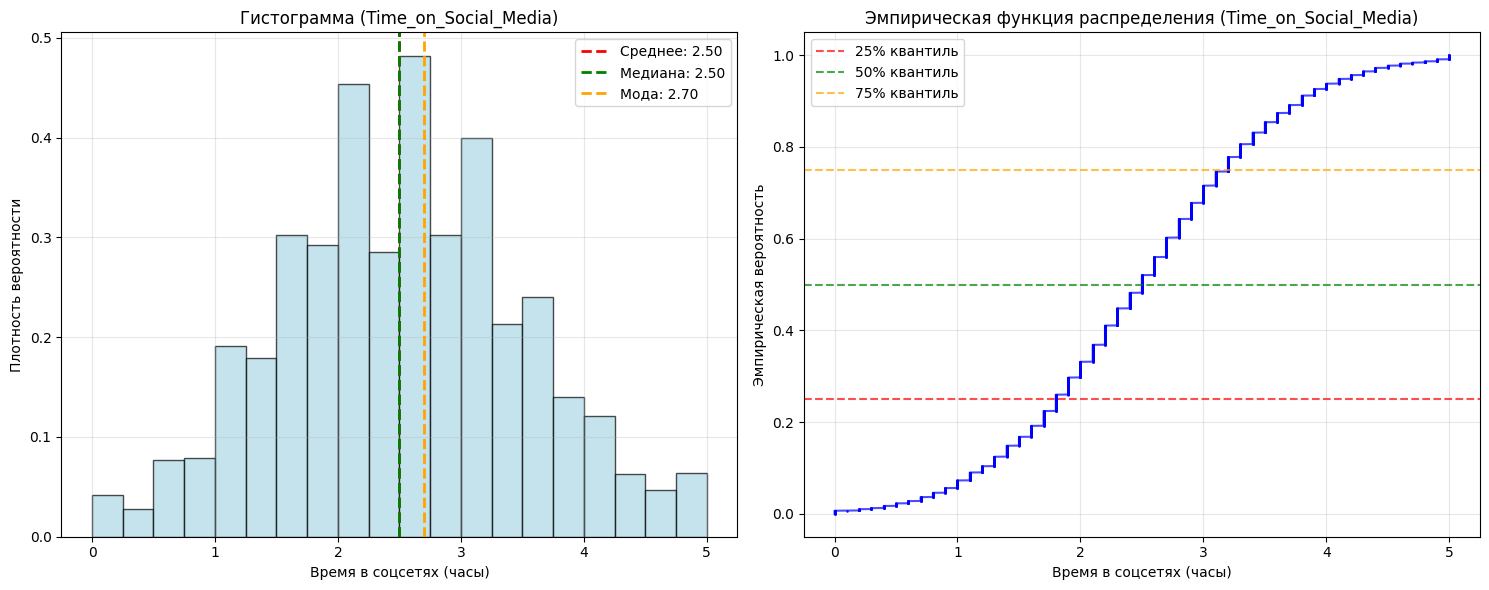

In [6]:
def descriptive_statistics(data, title_suffix="Time_on_Social_Media"):
    ev = np.mean(data)
    varian = np.var(data)
    mod_result = stats.mode(data)
    median = np.median(data)
    quantile_25 = np.quantile(data, 0.25)
    quantile_50 = np.quantile(data, 0.50)
    quantile_75 = np.quantile(data, 0.75)
    exess = stats.kurtosis(data)
    skew = stats.skew(data)
    inter = quantile_75 - quantile_25

    print(f"\nХАРАКТЕРИСТИКИ {title_suffix}:")
    print("-" * 40)
    print(f"• Среднее: {ev:.4f}")
    print(f"• Дисперсия: {varian:.4f}")
    print(f"• Мода: {mod_result.mode:.4f}")
    print(f"• Медиана: {median:.4f}")
    print(f"• Квантиль 0.25: {quantile_25:.4f}")
    print(f"• Квантиль 0.50: {quantile_50:.4f}")
    print(f"• Квантиль 0.75: {quantile_75:.4f}")
    print(f"• Эксцесс: {exess:.4f}")
    print(f"• Асимметрия: {skew:.4f}")
    print(f"• Интерквартильный размах: {inter:.4f}")

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data, bins=20, alpha=0.7, edgecolor='black', density=True, color='lightblue')
    plt.axvline(ev, color='red', linestyle='--', linewidth=2, label=f'Среднее: {ev:.2f}')
    plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median:.2f}')
    plt.axvline(mod_result.mode, color='orange', linestyle='--', linewidth=2, label=f'Мода: {mod_result.mode:.2f}')
    plt.xlabel('Время в соцсетях (часы)')
    plt.ylabel('Плотность вероятности')
    plt.title(f'Гистограмма ({title_suffix})')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(data)
    plt.plot(x, y, marker='.', linestyle='-', color='blue', alpha=0.7, markersize=2)
    plt.axhline(0.25, color='red', linestyle='--', alpha=0.7, label='25% квантиль')
    plt.axhline(0.50, color='green', linestyle='--', alpha=0.7, label='50% квантиль')
    plt.axhline(0.75, color='orange', linestyle='--', alpha=0.7, label='75% квантиль')
    plt.xlabel('Время в соцсетях (часы)')
    plt.ylabel('Эмпирическая вероятность')
    plt.title(f'Эмпирическая функция распределения ({title_suffix})')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    return ev, varian, skew, exess

mean, var, skew, kurt = descriptive_statistics(data, "Time_on_Social_Media")

Гистограмма показывает почти симметричное распределение с основным пиком в районе 2.7 часа. Поскольку асимметрия > 0 (0.067), наблюдается легкий правый хвост - небольшая часть подростков проводит в соцсетях значительно больше времени. Медиана равна среднему (2.50), что подтверждает близость к симметричному распределению.

Задание 2

Критерий Хи-квадрат:
 статистика=84.8304, критическое=16.9190, степени свободы=9
    Отвергаем: распределение НЕ нормальное
Проверка по асимметрии/эксцессу:
   Асимметрия = 0.0669 (Z = 1.50)
   Эксцесс = -0.2149 (Z = -2.40)
    Отвергаем: распределение НЕ нормальное
Корреляция на Q-Q plot: 0.998279


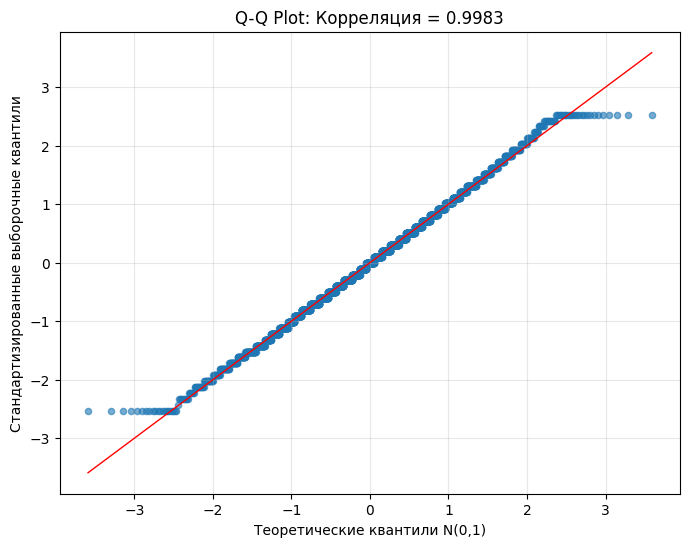

In [7]:
def normality_tests_library(data):
    mu = np.mean(data)
    sigma = np.std(data)
    n = len(data)

    k = int(1 + 3.322 * np.log10(n))
    bins = [np.min(data) - 0.001]
    for i in range(1, k):
        p = i / k
        bin_edge = stats.norm.ppf(p, mu, sigma)
        bins.append(bin_edge)
    bins.append(np.max(data) + 0.001)

    observed, _ = np.histogram(data, bins=bins)
    expected = []
    for i in range(len(bins)-1):
        p = stats.norm.cdf(bins[i+1], mu, sigma) - stats.norm.cdf(bins[i], mu, sigma)
        expected.append(p * n)

    observed_combined = []
    expected_combined = []
    current_obs = 0
    current_exp = 0

    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        if current_exp >= 5 or i == len(observed)-1:
            if current_exp > 0:
                observed_combined.append(current_obs)
                expected_combined.append(current_exp)
            current_obs = 0
            current_exp = 0

    chi2_stat = 0
    for i in range(len(observed_combined)):
        if expected_combined[i] > 0:
            chi2_stat += (observed_combined[i] - expected_combined[i])**2 / expected_combined[i]

    df_chi2 = len(observed_combined) - 3
    critical_value = stats.chi2.ppf(0.95, df_chi2)

    print(f"Критерий Хи-квадрат:\n статистика={chi2_stat:.4f}, критическое={critical_value:.4f}, степени свободы={df_chi2}")
    if chi2_stat < critical_value:
        print("    Не отвергаем: распределение нормальное")
    else:
        print("    Отвергаем: распределение НЕ нормальное")

    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
    
    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt

    print(f"Проверка по асимметрии/эксцессу:")
    print(f"   Асимметрия = {skewness:.4f} (Z = {z_skew:.2f})")
    print(f"   Эксцесс = {kurtosis:.4f} (Z = {z_kurt:.2f})")
    
    if abs(z_skew) < 1.96 and abs(z_kurt) < 1.96:
        print("    Не отвергаем: распределение нормальное")
    else:
        print("    Отвергаем: распределение НЕ нормальное")
    
    theoretical_quantiles = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n)
    sample_quantiles = (np.sort(data) - mu) / sigma

    qq_corr = np.corrcoef(theoretical_quantiles, sample_quantiles)[0, 1]
    print(f"Корреляция на Q-Q plot: {qq_corr:.6f}")
  
    plt.figure(figsize=(8, 6))
    plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.6, s=20)
    plt.plot([theoretical_quantiles.min(), theoretical_quantiles.max()], 
             [theoretical_quantiles.min(), theoretical_quantiles.max()], 'r-', linewidth=1)
    plt.xlabel('Теоретические квантили N(0,1)')
    plt.ylabel('Стандартизированные выборочные квантили')
    plt.title(f'Q-Q Plot: Корреляция = {qq_corr:.4f}')  
    plt.grid(alpha=0.3)
    plt.show()

normality_tests_library(data)

На основании статистических критериев распределение отклоняется от нормального - критерий Хи-квадрат и эксцесс показывают значимые различия. Оба критерия согласованно указывают, что распределение не является нормальным 

Задание 3

МЕТОД ПРЕОБРАЗОВАНИЯ: БЕЗ ВЫБРОСОВ

ХАРАКТЕРИСТИКИ без выбросов:
----------------------------------------
• Среднее: 2.4992
• Дисперсия: 0.9762
• Мода: 2.7000
• Медиана: 2.5000
• Квантиль 0.25: 1.8000
• Квантиль 0.50: 2.5000
• Квантиль 0.75: 3.2000
• Эксцесс: -0.2149
• Асимметрия: 0.0669
• Интерквартильный размах: 1.4000


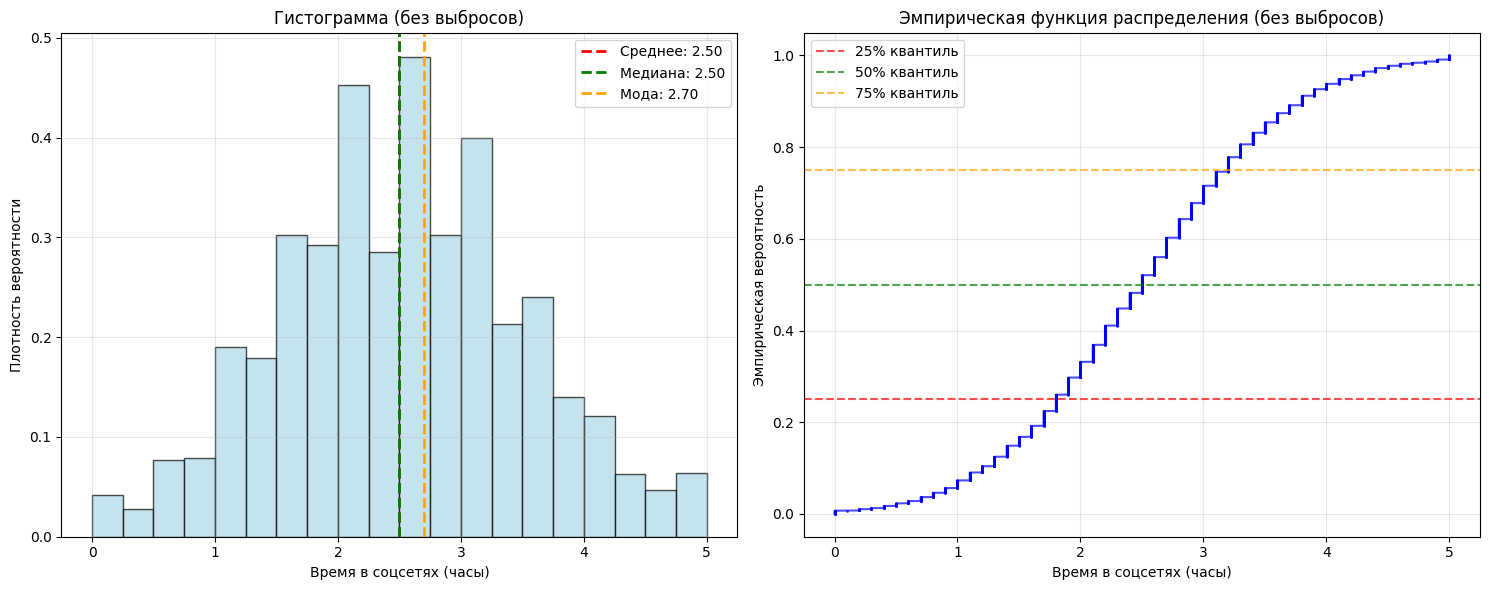

Критерий Хи-квадрат:
 статистика=84.8304, критическое=16.9190, степени свободы=9
    Отвергаем: распределение НЕ нормальное
Проверка по асимметрии/эксцессу:
   Асимметрия = 0.0669 (Z = 1.50)
   Эксцесс = -0.2149 (Z = -2.40)
    Отвергаем: распределение НЕ нормальное
Корреляция на Q-Q plot: 0.998279


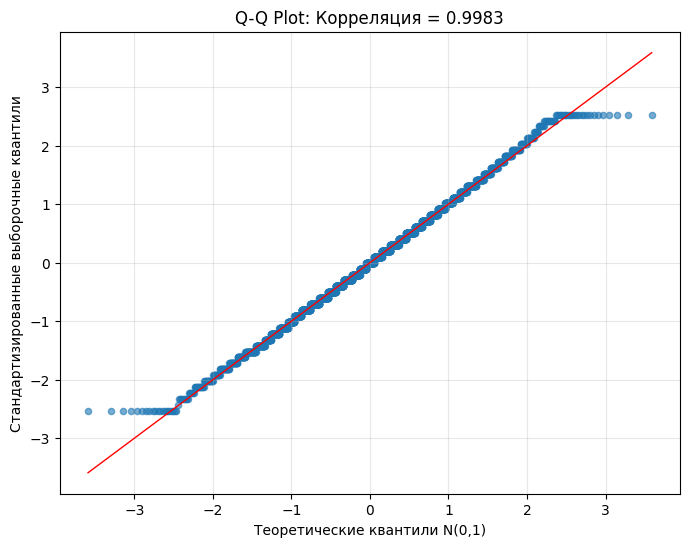

МЕТОД ПРЕОБРАЗОВАНИЯ: ЛОГАРИФМИРОВАННЫЕ

ХАРАКТЕРИСТИКИ логарифмированные:
----------------------------------------
• Среднее: 1.2076
• Дисперсия: 0.0979
• Мода: 1.3083
• Медиана: 1.2528
• Квантиль 0.25: 1.0296
• Квантиль 0.50: 1.2528
• Квантиль 0.75: 1.4351
• Эксцесс: 1.2550
• Асимметрия: -0.8852
• Интерквартильный размах: 0.4055


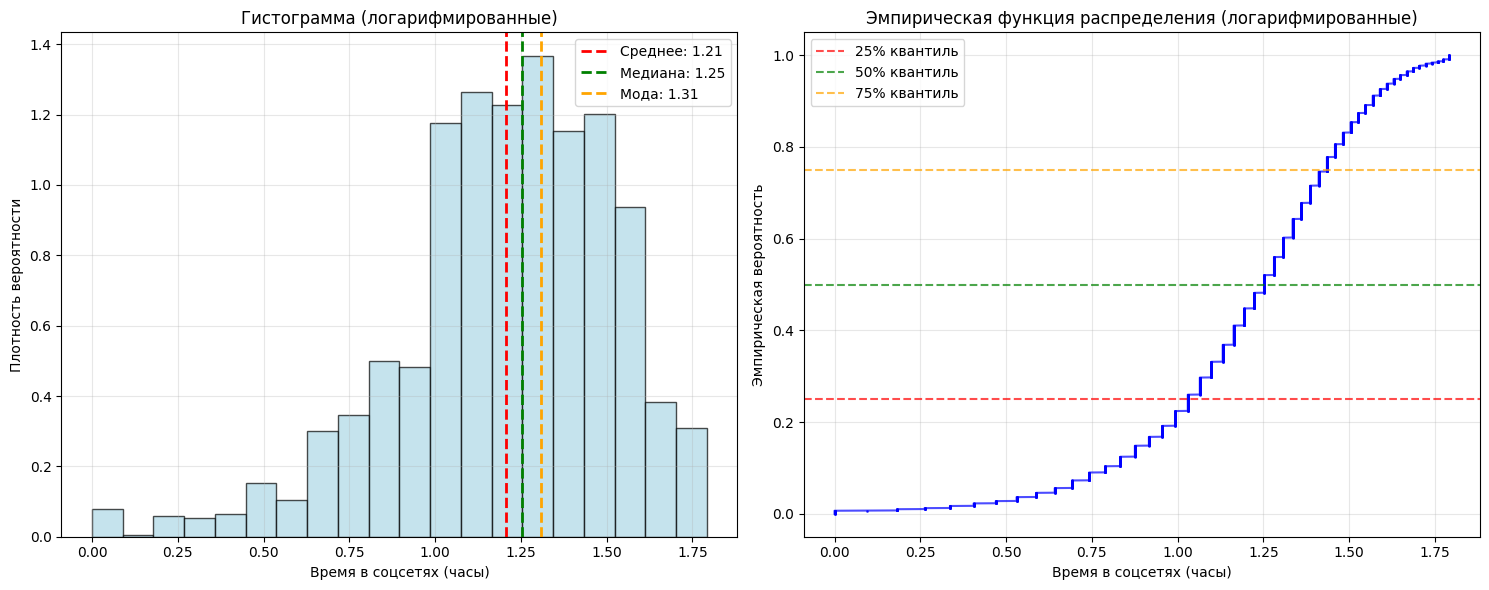

Критерий Хи-квадрат:
 статистика=134.9856, критическое=16.9190, степени свободы=9
    Отвергаем: распределение НЕ нормальное
Проверка по асимметрии/эксцессу:
   Асимметрия = -0.8852 (Z = -19.80)
   Эксцесс = 1.2550 (Z = 14.04)
    Отвергаем: распределение НЕ нормальное
Корреляция на Q-Q plot: 0.978463


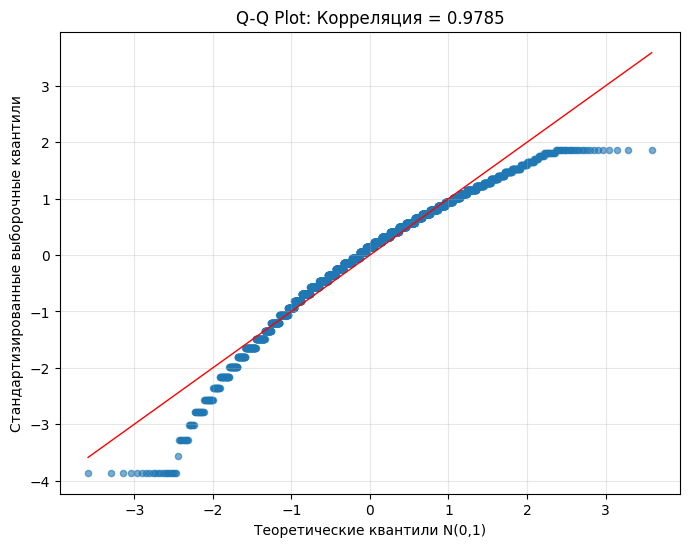

МЕТОД ПРЕОБРАЗОВАНИЯ: СТАНДАРТИЗИРОВАННЫЕ

ХАРАКТЕРИСТИКИ стандартизированные:
----------------------------------------
• Среднее: -0.0000
• Дисперсия: 1.0000
• Мода: 0.2032
• Медиана: 0.0008
• Квантиль 0.25: -0.7077
• Квантиль 0.50: 0.0008
• Квантиль 0.75: 0.7093
• Эксцесс: -0.2149
• Асимметрия: 0.0669
• Интерквартильный размах: 1.4170


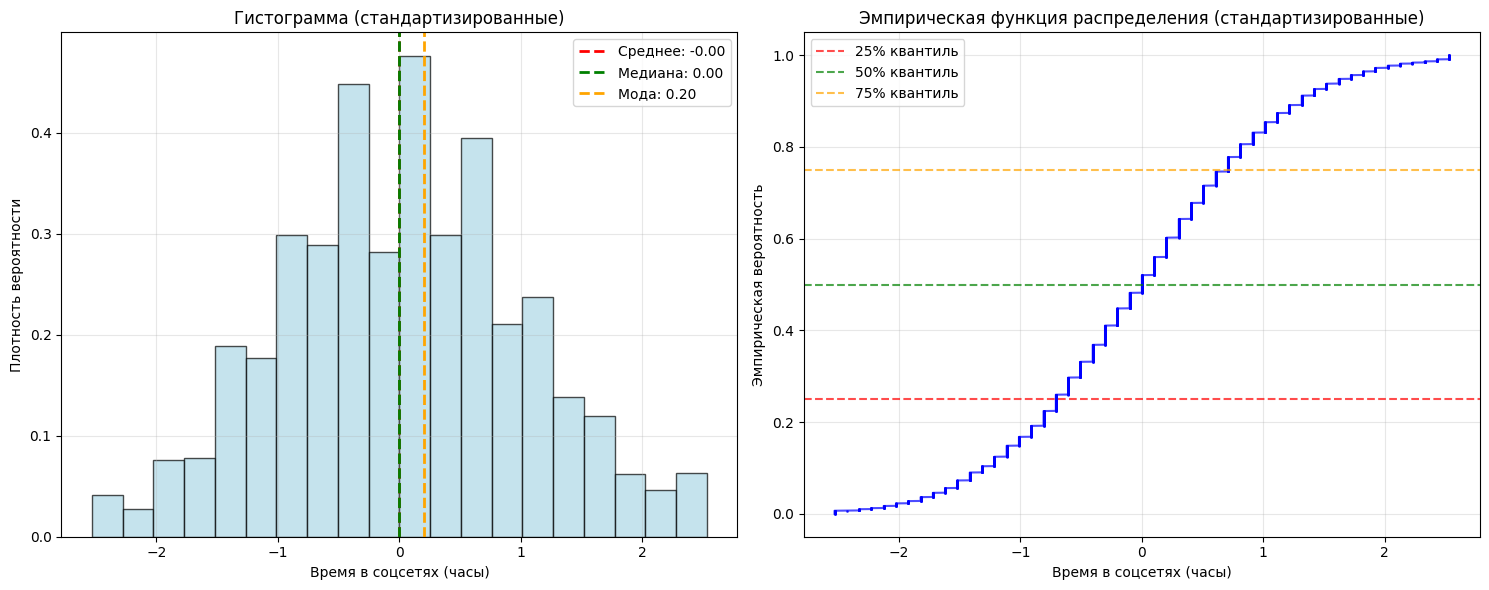

Критерий Хи-квадрат:
 статистика=84.8308, критическое=16.9190, степени свободы=9
    Отвергаем: распределение НЕ нормальное
Проверка по асимметрии/эксцессу:
   Асимметрия = 0.0669 (Z = 1.50)
   Эксцесс = -0.2149 (Z = -2.40)
    Отвергаем: распределение НЕ нормальное
Корреляция на Q-Q plot: 0.998279


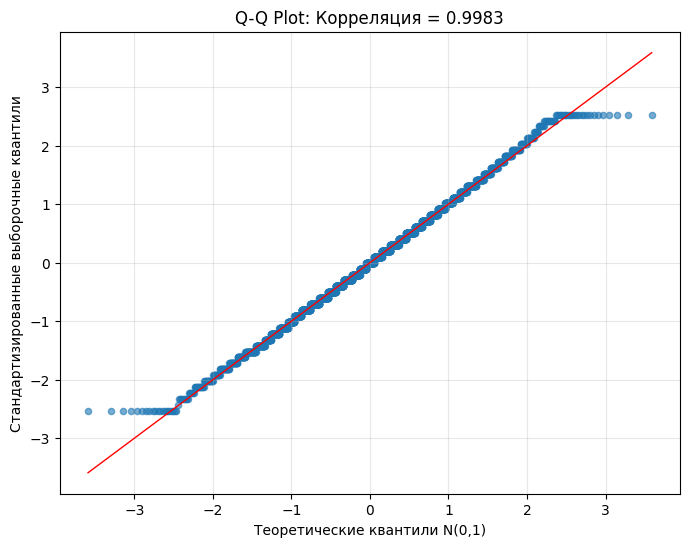

In [10]:
def preprocess_and_analyze(data, method):
    if method == "remove_outliers":
        q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
        new_data = data[(data >= lower) & (data <= upper)]
        title_suffix = "без выбросов"
        
    elif method == "log":
        new_data = np.log1p(data)
        title_suffix = "логарифмированные"
        
    elif method == "standardize":
        new_data = (data - np.mean(data)) / np.std(data)
        title_suffix = "стандартизированные"
        
    else:
        raise ValueError("Неизвестный метод")

    print(f"МЕТОД ПРЕОБРАЗОВАНИЯ: {title_suffix.upper()}")
    
    mean, var, skew, kurt = descriptive_statistics(new_data, title_suffix)
    
    normality_tests_library(new_data)
    
    return new_data

methods = ["remove_outliers", "log", "standardize"]
transformed_data = {}

for method in methods:
    transformed_data[method] = preprocess_and_analyze(data, method)

Простые методы нормализации (логарифмирование, стандартизация, удаление выбросов) не дали нормального распределения, а даже отдалили от него

Задание 4

Класс    Среднее    Дисперсия    n     
----------------------------------------
10th     2.5240     0.9227       487   
11th     2.4879     0.9459       479   
12th     2.4639     1.0140       529   
7th      2.5400     0.9196       497   
8th      2.4699     1.0304       482   
9th      2.5105     1.0260       526   


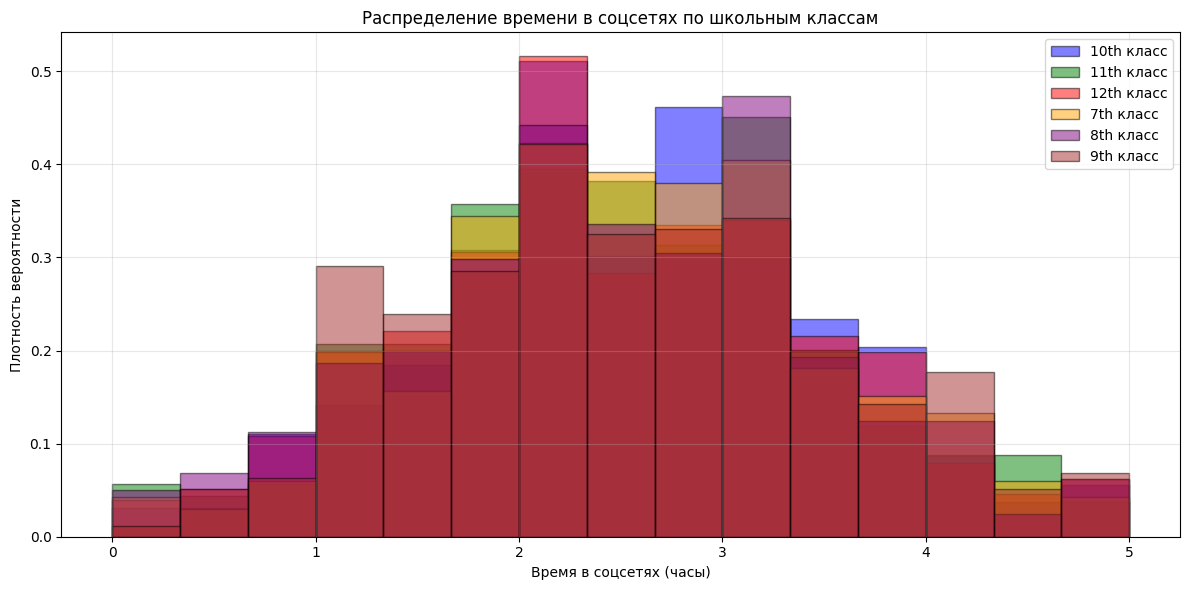

In [14]:
def analyze_by_school_grade(df):
    grouped = df.groupby('School_Grade')['Time_on_Social_Media']
    
    print(f"{'Класс':<8} {'Среднее':<10} {'Дисперсия':<12} {'n':<6}")
    print("-" * 40)
    
    for grade, group_data in grouped:
        mean_val = group_data.mean()
        var_val = group_data.var()
        count = len(group_data)
        print(f"{grade:<8} {mean_val:<10.4f} {var_val:<12.4f} {count:<6}")
    
    grades = sorted(df['School_Grade'].unique())
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
    
    plt.figure(figsize=(12, 6))
    
    for i, grade in enumerate(grades):
        group_data = grouped.get_group(grade)
        plt.hist(group_data, bins=15, alpha=0.5, color=colors[i], 
                edgecolor='black', density=True, label=f'{grade} класс')
    
    plt.xlabel('Время в соцсетях (часы)')
    plt.ylabel('Плотность вероятности')
    plt.title('Распределение времени в соцсетях по школьным классам')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

analyze_by_school_grade(df)

Все классы проводят в соцсетях примерно одинаковое время (около 2.5 часов).Дисперсия чуть выше в 8–9 классах, что может говорить о более разнородном поведении (часть проводит очень много времени, часть мало).Общая картина: возраст не влияет на использование соцсетей в выборке.